<a href="https://colab.research.google.com/github/Fabriloko/Machine_Learn/blob/main/Lista1_Fabricio_414900_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
artificial_dataset = np.genfromtxt('/content/artificial1d.csv',delimiter=',') # 1º dataset
boston_dataset = np.genfromtxt('/content/boston.csv',delimiter=',') # 2º dataset 

**Autor:** Fabrício Araújo Barbosa, 414900



# **Funções Uteis**

In [ ]:
def MSE(y,y_pred): # Calcula o MSE
  return np.mean((y - y_pred)**2)

def RMSE(y,y_pred): # Calcula o MSE
  return np.mean(np.sqrt((y - y_pred)**2))

def plot_aprend(mse_it,itracoes=100): #plota a curva de aprendizado
  #Plot dos dados
  plt.plot(mse_it)
  plt.xlabel("Iteracoes")
  plt.ylabel("MSE")
  plt.title("Erro X Iteracoes ")
  plt.xlim(0,itracoes); # Limtando o grafico para 100 iteracoes

class normalize_01():
  def __init__(self, X):
    self.min = np.min(X,axis=0)
    self.max = np.max(X,axis=0)
  def norma(self, X):
    return (X - self.min)/(self.max - self.min)
  def desnorm(self, X):
    return X * (self.max - self.min) + self.min

def polinomios(dados,grau):
  dados_n = dados
  if grau == 1:
    return dados_n
  else: 
    for i in range(2,grau):
      dados_n = np.hstack((dados_n,dados**grau))
    return dados_n


# Lista 1 - Regressão linear, polinomial e regularização:

## **Questão 1:**

**Item a)** MSE e o vetor de parâmetros *w* pelo método **OLS**.

Esses são os resultados:
Vetor de Parametros:
[[0.06761792]
 [1.57486517]]
MSE - Erro Quadratico Medio é de 0.21340090132936987 



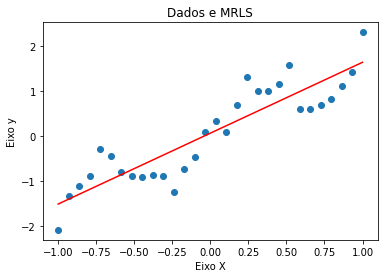

In [ ]:
X = np.c_[np.ones(artificial_dataset.shape[0]),artificial_dataset[:,0]]

y = artificial_dataset[:,[1]] #Vetor de saidas desejadas

w_OLS = np.linalg.inv(X.T @ X) @ X.T @ y #Vetor de parametros
#w = np.linalg.solve(X.T @ X, X.T @ y) #Vetor de parametros - Outro método

pred = X @ w_OLS #Vetor de saidas estimadas

mse_OLS = MSE(y, pred) # Erro Quadratico Medio

print("Esses são os resultados:")
print("Vetor de Parametros:")
print(w_OLS)
print("MSE - Erro Quadratico Medio é de", mse_OLS,'\n')

#Plot dos dados
X_test = np.c_[np.ones(100), np.linspace(X[:,1].min(), X[:,1].max(),100)]

plt.scatter(X[:,1],y)
plt.plot(X_test[:,1], X_test @ w_OLS, color = 'red')
plt.xlabel("Eixo X")
plt.ylabel("Eixo y")
plt.title("Dados e MRLS");
#print(w_OLS@(1,200))

**Item b)** MSE e o vetor de parâmetros *w* pelo método **GD**.

Esses são os resultados:
Vetor de Parametros:
[[0.06761613]
 [1.53303263]]
MSE - Erro Quadratico Medio é de 0.21340090132936987 



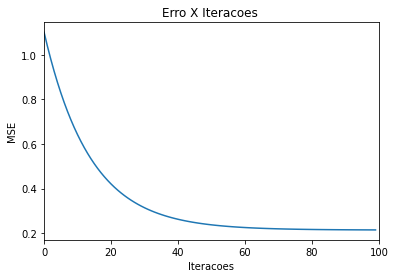

In [ ]:
X = np.c_[np.ones(artificial_dataset.shape[0]),artificial_dataset[:,0]]
y = artificial_dataset[:,[1]] #Vetor de saidas desejadas

def GD(X, y):
  alpha = 0.1 # Valor de Alpha
  iteracoes = 100 # Numero maximo de iteracoes

  w_GD = np.zeros((X.shape[1],1)) # Vetor de parametros iniciais

  mse_it = [] # Historico do MSE

  #Laco de atualizacao
  for i in range(iteracoes):
    pred = X @ w_GD #Vetor de saidas estimadas
    e = y - pred # Atualizacao do Erro
    w_GD = w_GD + alpha * X.T @ e / X.shape[0] # Atualizacao do vetor de parametros
    mse_it.append(MSE(y, pred)) # Atualizacao do historico do MSE
  return w_GD, mse_it

w_GD, mse_it = GD(X, y) 
mse_GD = MSE(y, pred) # Erro Quadratico Medio

print("Esses são os resultados:")
print("Vetor de Parametros:")
print(w_GD)
print("MSE - Erro Quadratico Medio é de", mse_GD,'\n')
plot_aprend(mse_it) #Plot dos dados

**Item C)** MSE e o vetor de parâmetros *w* pelo método **SGD**.

Esses são os resultados:
Vetor de Parametros:
[[-0.08626739]
 [ 1.56240459]]
MSE - Erro Quadratico Medio é de 0.23713691464110206 



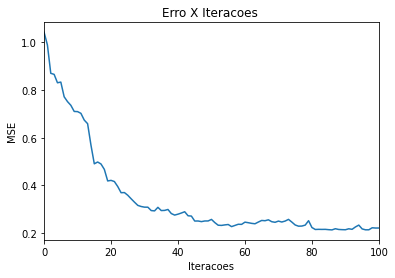

In [ ]:
X = np.c_[np.ones(artificial_dataset.shape[0]),artificial_dataset[:,:-1]]
y = artificial_dataset[:,[1]] #Vetor de saidas desejadas

def SGD(X, y):
  alpha = 0.1 # Valor de Alpha
  iteracoes = 100 # Numero maximo de iteracoes

  w_SGD = np.zeros((X.shape[1],1)) # Vetor de parametros iniciais
  
  mse_it = [] # Historico do MSE

  #Laco de atualizacao
  for i in range(iteracoes):
    for i in np.random.permutation(X.shape[0]): # Permutacao aleatoria das entradas
      y_pred = w_SGD.T @ X[[i]].T #Saida estimada para y_i
      error = y[i] - y_pred # Atualizacao do Erro para y_i
      w_SGD = w_SGD + alpha * error * X[[i]].T # Atualizacao do vetor de parametros
      mse_it.append(MSE(y, X @ w_SGD)) # Atualizacao do historico do MSE
  return w_SGD, mse_it

w_SGD, mse_it = SGD(X, y)
#print(w_SGD)
pred = X @ w_SGD
mse_SGD = MSE(y, pred) # Erro Quadratico Medio

print("Esses são os resultados:")
print("Vetor de Parametros:")
print(w_SGD)
print("MSE - Erro Quadratico Medio é de", mse_SGD,'\n')
plot_aprend(mse_it) #Plot dos dados

**Comparações:**

In [ ]:
print("O Erro Quadratico Medio do GD :", mse_GD) # MSE do GD
print("O Erro Quadratico Medio do SGD :", mse_SGD) # MSE do SGD
print("O Erro Quadratico Medio do OLS :", mse_OLS , "\n \n") # MSE do OLS

print("O Vetor de Parametros do GD \n:", w_GD) # Vetor de prametros GD
print("O Vetor de Parametros do SGD \n:", w_SGD) # Vetor de prametros SGD
print("O Vetor de Parametros do OLS \n:", w_OLS) # Vetor de prametros OLS


O Erro Quadratico Medio do GD : 0.21340090132936987
O Erro Quadratico Medio do SGD : 0.23713691464110206
O Erro Quadratico Medio do OLS : 0.21340090132936987 
 

O Vetor de Parametros do GD 
: [[0.06761613]
 [1.53303263]]
O Vetor de Parametros do SGD 
: [[-0.08626739]
 [ 1.56240459]]
O Vetor de Parametros do OLS 
: [[0.06761792]
 [1.57486517]]


## Questão 2:

**Item a)** Aleatoriamente, dividir o conjunto de dados em **treino (80%)** e **teste (20%)**.

In [ ]:
boston = boston_dataset[:,:] #Atriuindo o X_1 e Bosto_dataset
X = np.c_[np.ones(boston_dataset.shape[0]),boston[:,:-1]]
y = boston[:,[-1]]

def dividir_treino_teste(dados):
  np.random.shuffle(dados)
  X_treino = dados[:,:-1][:int(len(dados)*0.8)]
  X_teste  = dados[:,:-1][int(len(dados)*0.8):]
  y_treino = dados[:,[-1]][:int(len(dados)*0.8)]
  y_teste  = dados[:,[-1]][int(len(dados)*0.8):]
  return y_treino,y_teste,X_treino, X_teste

#X_treino, X_teste, y_treino, y_teste = dividir_treino_teste(boston)


**Item b)** Treine 11 modelos de **regressão polinomial**, com ordens de 1 a 11.


In [ ]:
X = boston[:,:-1]
y = boston[:,[-1]]

w = np.zeros((X.shape[1],1))
w_treino = []
rmse_poli_treino = []
rmse_poli_teste = []
for i in range(1,12):
  dados_poli = polinomios(boston,i)
  y_treino_poli, y_teste_poli, X_treino_poli, X_teste_poli = dividir_treino_teste(dados_poli) # Definindo a matriz X de treino e teste polinomial

  I = np.eye(X_treino_poli.shape[1]) # Matriz Identidade

  # Normalização das Variáveis
  normalize_X = normalize_01(X_treino_poli)
  normalize_y = normalize_01(y_treino_poli)

  #norm_X_treino_poli = np.c_[np.ones(X_treino_poli.shape[0]),normalize_X.norma(X_treino_poli)] # Normalizando X
  norm_X_treino_poli = normalize_X.norma(X_treino_poli)
  y_treino_poli = normalize_y.norma(y_treino_poli) # Normalizando y
  
  # Treinado W via OLS
  w = (np.linalg.pinv(norm_X_treino_poli.T @ norm_X_treino_poli) + (I * 10 ** -10)) @ norm_X_treino_poli.T @ y_treino_poli
  #w = np.linalg.solve(norm_X_treino_poli.T @ norm_X_treino_poli + (I * 10 ** -10), norm_X_treino_poli.T @ y_treino_poli)

  # Desnormalizando as Variáveis
  y_treino_poli = normalize_y.desnorm(y_treino_poli)
  #X_treino_poli = np.c_[np.ones(X_treino_poli.shape[0]),X_treino_poli]
  #X_teste_poli = np.c_[np.ones(X_teste_poli.shape[0]),X_teste_poli]
  
  # Predizendo o vetor y
  y_pred_treino = X_treino_poli @ w;
  y_pred_teste  = X_teste_poli  @ w;
  w_treino.append(w)

  #Calculando o MSE do Modelo 
  rmse_poli_treino.append(RMSE(y_treino_poli ,y_pred_treino)) 
  rmse_poli_teste.append(RMSE(y_teste_poli ,y_pred_teste)) 

print("RMSE_Treino:", rmse_poli_treino)
print("RMSE_Teste:" , rmse_poli_teste )


RMSE_Treino: [20.420542096681228, 22.95849884472649, 24154082.895704977, 217.1481539489372, 110056.05470029733, 52633754.940124534, 20264675996.258884, 16828661737894.85, 1.0080616857983738e+16, 1.1354107706939181e+19, 4.5870617403069584e+21]
RMSE_Teste: [24.934470547206658, 25.339580929560885, 26882208.431650914, 220.8860941229281, 115190.68716481824, 59178903.14935496, 24769343395.126312, 16312700965811.82, 1.144239013203095e+16, 9.75840379994868e+18, 4.4933763670745206e+21]



**Item c)** Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.


Os resultados são:


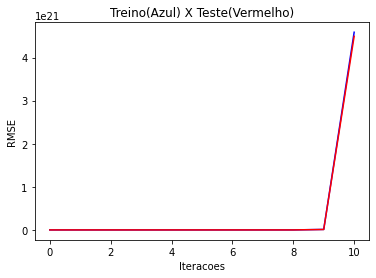

In [ ]:
rmse_treino = rmse_poli_treino
rmse_teste = rmse_poli_teste
print("Os resultados são:")

plt.plot(rmse_treino,color='blue');
plt.plot(rmse_teste,color='red');
plt.xlabel("Iteracoes");
plt.ylabel("RMSE");
plt.title("Treino(Azul) X Teste(Vermelho)");


**Item d)** Repita os 2 itens anteriores incluindo um termo de regularização L2
com fator λ = 0.01.

In [ ]:
X = boston[:,:-1]
y = boston[:,[-1]]

lamb = 0.01
w = np.zeros((X.shape[1],1))
w_treino = []
mse_poli_treino = []
mse_poli_teste = []
I = np.eye(X.shape[1])
for i in range(1,12):
  dados_poli = polinomios(boston,i)
  y_treino_poli, y_teste_poli, X_treino_poli, X_teste_poli = dividir_treino_teste(dados_poli) # Definindo a matriz X de treino e teste polinomial

  # Normalização das Variáveis
  normalize_X = normalize_01(X_treino_poli)
  normalize_y = normalize_01(y_treino_poli)
  #norm_X_treino_poli = np.c_[np.ones(X_treino_poli.shape[0]),normalize_X.norma(X_treino_poli)] # Normalizando X
  norm_X_treino_poli = normalize_X.norma(X_treino_poli)
  y_treino_poli = normalize_y.norma(y_treino_poli) # Normalizando y
  
  # Treinado W via OLS
  w = np.linalg.solve(norm_X_treino_poli.T @ norm_X_treino_poli + lamb * I, norm_X_treino_poli.T @ y_treino_poli)

  # Desnormalizando as Variáveis
  y_treino_poli = normalize_y.desnorm(y_treino_poli)
  #X_treino_poli = np.c_[np.ones(X_treino_poli.shape[0]),X_treino_poli]
  #X_teste_poli = np.c_[np.ones(X_teste_poli.shape[0]),X_teste_poli]
  
  # Predizendo o vetor y
  y_pred_treino = X_treino_poli @ w;
  y_pred_teste = X_teste_poli @ w;
  w_treino.append(w)

  #Calculando o MSE do Modelo 
  mse_poli_treino.append(MSE(y_treino_poli ,y_pred_treino)) 
  mse_poli_teste.append(MSE(y_teste_poli ,y_pred_teste)) 

print("RMSE_Treino:",np.sqrt(mse_poli_treino))
print("RMSE_Teste:" ,np.sqrt(mse_poli_teste ))

rmse_treino = np.sqrt(mse_poli_treino)
rmse_teste = np.sqrt(mse_poli_teste)
print("\n","Os resultados são:")

plt.plot(rmse_treino,color='blue');
plt.plot(rmse_teste,color='red');
plt.xlabel("Iteracoes");
plt.ylabel("RMSE");
plt.title("Treino(Azul) X Teste(Vermelho) ");